In [2]:
import random
import numpy as np
from skimage import io, util
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
import os
import pickle

# Function to convert mask to y
def mask_to_y(mask):
    return mask.flatten()

# Function to extract patches from the green channel of an image
def image_to_X(image, patch_size=5):
    pad_size = patch_size // 2
    padded = np.pad(image[:, :, 1], (pad_size, pad_size), mode='constant', constant_values=0)
    patches = util.view_as_windows(padded, window_shape=(patch_size, patch_size), step=1)
    return patches.reshape(-1, patch_size*patch_size)

# Parameters
patch_size = 11
sample_percentage = 0.05
image_folder = 'images'
mask_folder = 'manual1'

# Collect image and mask file paths
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
mask_files = sorted([f for f in os.listdir(mask_folder) if f.endswith('.tif')])

X_train_list = []
y_train_list = []

selected_indices = random.sample(range(len(image_files)), 5)
selected_image_files = [image_files[i] for i in selected_indices]
# change extension to tif and folder to manual1
selected_mask_files = [f.replace('.jpg', '.tif') for f in selected_image_files]

X_train_list = []
y_train_list = []

# Load and process each pair of selected image and mask files
for image_file, mask_file in zip(selected_image_files, selected_mask_files):
    image_path = os.path.join(image_folder, image_file)
    mask_path = os.path.join(mask_folder, mask_file)

    fundus = io.imread(image_path)
    mask = io.imread(mask_path, as_gray=True).astype(np.uint8)

    y_train_list.append(mask_to_y(mask))
    X_train_list.append(image_to_X(fundus, patch_size))


# Concatenate all image patches and mask labels
X_train = np.vstack(X_train_list)
y_train = np.concatenate(y_train_list)

# Select a subsample - 5% of all examples + undersampling
n_train = X_train.shape[0]
sub = np.random.choice(n_train, int(sample_percentage * n_train), replace=False)
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train[sub], y_train[sub])

# Train the model
model = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model.fit(X_under, y_under)

# Save the trained model
with open('model-green.pkl', 'wb') as f:
    pickle.dump(model, f)




In [3]:
model

RandomForestClassifier(n_estimators=200, n_jobs=-1)

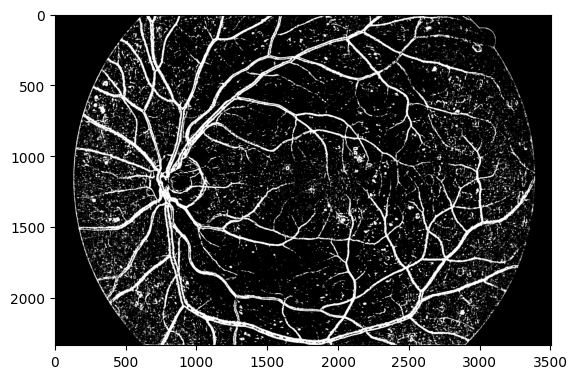

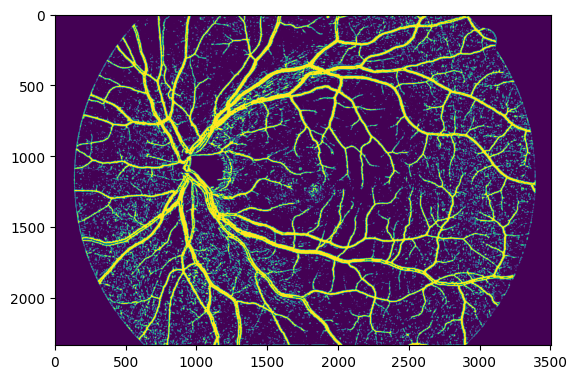

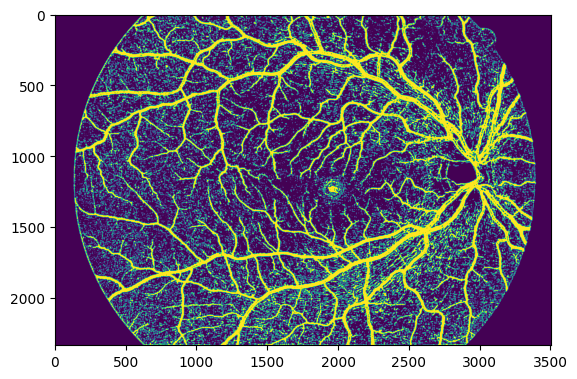

In [5]:
# Test model
test_1 = io.imread('images/01_dr.jpg')
test_2 = io.imread('images/02_h.jpg')
test_3 = io.imread('images/11_h.jpg')

X_test_1 = image_to_X(test_1, patch_size)
X_test_2 = image_to_X(test_2, patch_size)
X_test_3 = image_to_X(test_3, patch_size)

y_pred_1 = model.predict(X_test_1)
y_pred_2 = model.predict(X_test_2)
y_pred_3 = model.predict(X_test_3)

y_pred_1 = y_pred_1.reshape(test_1.shape[0], test_1.shape[1])
y_pred_2 = y_pred_2.reshape(test_2.shape[0], test_2.shape[1])
y_pred_3 = y_pred_3.reshape(test_3.shape[0], test_3.shape[1])

# show it plt
import matplotlib.pyplot as plt
plt.imshow(y_pred_1, cmap='gray')
plt.show()
plt.imshow(y_pred_2)
plt.show()
plt.imshow(y_pred_3)
plt.show()

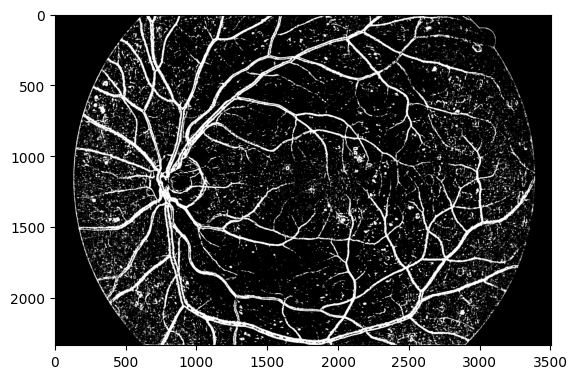

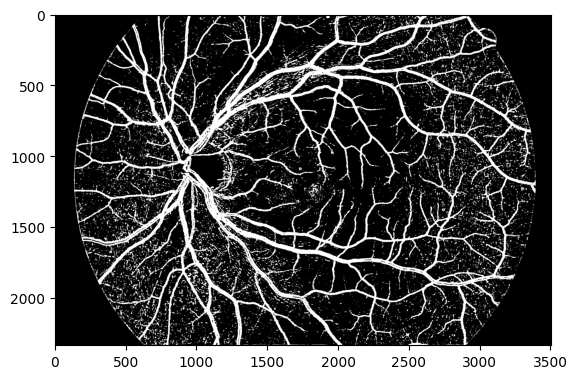

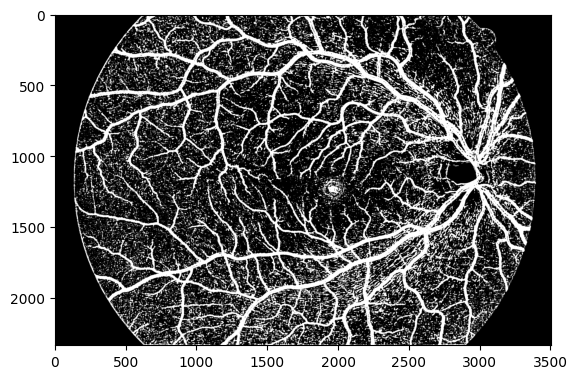

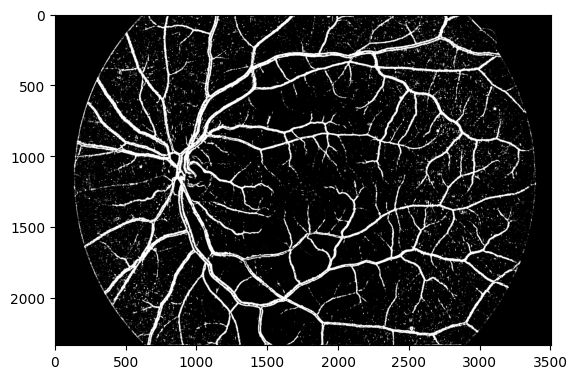

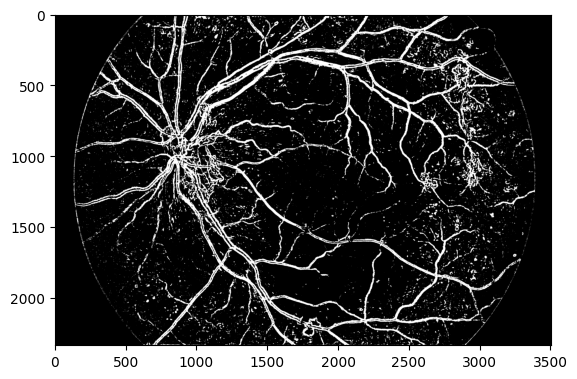

NameError: name 'cv2' is not defined

In [8]:
test_4 = io.imread('images/09_g.jpg')
test_5 = io.imread('images/12_dr.jpg')

X_test_4 = image_to_X(test_4, patch_size)
X_test_5 = image_to_X(test_5, patch_size)

y_pred_4 = model.predict(X_test_4)
y_pred_5 = model.predict(X_test_5)


y_pred_4 = y_pred_4.reshape(test_4.shape[0], test_4.shape[1])
y_pred_5 = y_pred_5.reshape(test_5.shape[0], test_5.shape[1])

plt.imshow(y_pred_1, cmap='gray')
plt.show()
plt.imshow(y_pred_2, cmap='gray')
plt.show()
plt.imshow(y_pred_3, cmap='gray')
plt.show()
plt.imshow(y_pred_4, cmap='gray')
plt.show()
plt.imshow(y_pred_5, cmap='gray')
plt.show()








In [9]:
import cv2

cv2.imwrite("y_pred_1.png", y_pred_1)
cv2.imwrite("y_pred_2.png", y_pred_2)
cv2.imwrite("y_pred_3.png", y_pred_3)
cv2.imwrite("y_pred_4.png", y_pred_4)
cv2.imwrite("y_pred_5.png", y_pred_5)


True